# <center style='color:fuchsia'> Homogeneity Score (`HS`), Completeness Score (`CS`), V-Measure Score (`VMS`) and Fowlkes-Mallows Score (`FMS`) - Example using `breast_cancer` dataset </center>

## 1. Import required libraries

In [1]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load sklearn's `breast_cancer` dataset 

In [2]:
cancer = datasets.load_breast_cancer()
data = cancer.data
targets = cancer.target

In [3]:
data.shape # 569 samples and 30 features

(569, 30)

In [4]:
cancer.feature_names # the names of 30 features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
cancer.target_names # the names of targets

array(['malignant', 'benign'], dtype='<U9')

So, there are two different targets.

## 3. Create a dataframe

In [6]:
df = pd.DataFrame(data, columns=cancer.feature_names)
df['target_names'] = targets # add targets to the dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.target_names.value_counts()

1    357
0    212
Name: target_names, dtype: int64

So, cancer type `malignant (0)` and `benign (1)` are present 212 and 357 times, respectively in the __breast_cancer__ dataset.

## 4. Separate features from the dataframe

In [8]:
features = df.iloc[:, :-1]
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
features.shape # same shape as 'data'

(569, 30)

## 5. Perform preprocessing

In [10]:
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

## 6. Scaled dataframe

In [11]:
df_scaled = pd.DataFrame(scaled, columns=features.columns)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [12]:
df_scaled.shape

(569, 30)

## 7. Perform K-Means clustering considering 2 clusters

In [13]:
kmeans = KMeans(n_clusters=2, random_state=33, n_init='auto')
kmeans.fit(df_scaled)
preds = kmeans.labels_

## 8. Add two new columns to the scaled dataframe

In [14]:
df_scaled['ground_truth'] = targets
df_scaled['prediction'] = preds
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,ground_truth,prediction
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0,0


In [15]:
print(df_scaled.ground_truth.unique())
print(df_scaled.prediction.unique())

[0 1]
[0 1]


## 9. Clustering comparison between ground truths and predictions

In [16]:
cm = metrics.confusion_matrix(targets, preds)

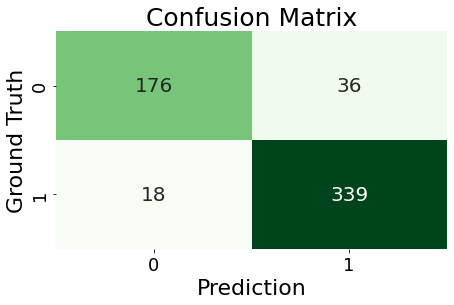

In [17]:
plt.figure(figsize=(7, 4))

sns.heatmap(cm, annot=True, fmt='d', cbar=False, annot_kws={'size': 20}, cmap='Greens')

plt.xlabel('Prediction', fontsize=22)
plt.ylabel('Ground Truth', fontsize=22)
plt.title('Confusion Matrix', fontsize=25)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

## 10. Calculate `Homogeneity Score (HS)`

In [18]:
print('Homogeneity Score (HS):', round(metrics.homogeneity_score(targets, preds), 5))

Homogeneity Score (HS): 0.52489


## 11. Calculate `Completeness Score (CS)`

In [19]:
print('Completeness Score (CS):', round(metrics.completeness_score(targets, preds), 5))

Completeness Score (CS): 0.54015


## 12. Calculate `V-Measure Score (VMS)`

In [20]:
print('V-Measure Score (VMS):', round(metrics.v_measure_score(targets, preds), 5))

V-Measure Score (VMS): 0.53241


## 13. Calculate `Fowlkes-Mallows Score (FMS)`

In [21]:
print('Fowlkes-Mallows Score (FMS):', round(metrics.fowlkes_mallows_score(targets, preds), 5))

Fowlkes-Mallows Score (FMS): 0.84098


### Higher scores are desired for `HS`, `CS`, `VMS` and `FMS`.